# Import packages

In [1]:
# Import OceanSpy
import oceanspy as ospy

# Additional imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from cartopy.crs import PlateCarree
import scipy.io as sio
import os

# Start client for multiprocessing

In [2]:
# Maybe we can show the dask dashboard using binder,
# but I don't think there will be much going on
# because the data is quite small.
# We usually chunk along the time dimension.
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:46480 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 257.77 GB


In [3]:
data_dir = 'IDIES_symposium'
if not os.path.isdir(data_dir):
    # Download data
    import subprocess
    print("Downloading and uncompressing get_started data...")
    print("...it might take a couple of minutes.")
    commands = ['wget -v -O IDIES_symposium.tar.gz -L '
                'https://jh.box.com/shared/static/'
                'lhl33nj9pqowhge9zbnjvhqk3imgilcd.gz',
                'tar xvzf IDIES_symposium.tar.gz',
                'rm -f IDIES_symposium.tar.gz']
    subprocess.call('&&'.join(commands), shell=True)
    subprocess.call('&&'.join(commands), shell=True)

# Set parameters for plotting

In [4]:
# Coordinates of the sections
X_Latrabjarg = [-29.8, -24.6]
Y_Latrabjarg = [66.8,  65.5]
map_extent = [-39.9, -19, 63, 67.75]
ylim = (-700, 0)

# Colors
land_col = (253/255, 180/255, 108/255)
bottom_col = 'grey'
cmap_vel = 'RdBu_r'
cmap_hyd = 'rainbow'
cmap_N2 = 'PuBuGn_r'

# Level for contours (commonly used by observational oceanographers)
lev_vel = np.arange(-0.5, 0.51, 0.05)
lev_Temp = [-1, -0.25, 0, 0.25, 0.5, 0.75,
            1, 1.5, 2, 2.5, 3, 3.5, 4,
            4.5, 5, 5.5, 6, 7, 8] 
lev_S = [31, 33, 33.5, 34, 34.2,
         34.4, 34.5, 34.6, 34.7,
         34.75, 34.8, 34.85, 34.9,
         34.92, 34.96, 35,
         35.05, 35.1, 35.2] 
lev_Sigma0 = [26.5, 27, 27.25, 27.5, 27.6,
              27.7, 27.8, 27.9,
              27.95, 28]
lev_N2 = [0, 1.E-6, 2.E-6, 5.E-6, 1.E-5,
          2.E-5, 5.E-5, 1.E-4, 5.E-4]

# Plot parameters
mpl.rcParams.update({'font.size': 22})
clabel_size = 15

# Open datasets
This will be downloaded from the box

In [5]:
# Open model dataset
od_vage2011 = ospy.open_oceandataset.from_zarr(os.path.join(data_dir, 'vage2011'))
od_mastropole2017 = ospy.open_oceandataset.from_zarr(os.path.join(data_dir, 'mastropole2017'))

# Open observations
vage2011 = sio.loadmat(os.path.join(data_dir, 'observations/Velocities_VageEtAl2011.mat'))
mastropole2017 = sio.loadmat(os.path.join(data_dir, 'observations/meanFields_MastrpoleEtAl2017.mat'))
bathyobs = sio.loadmat(os.path.join(data_dir, 'observations/LatBat.mat'))

Opening dataset from [IDIES_symposium/vage2011].
Opening dataset from [IDIES_symposium/mastropole2017].


# Show datasets

In [6]:
print('Here is the oceandataset to compare with Våge et al., 2011 - Nature Geoscience:\n')
print(od_vage2011)
print('\n\nAvailable variables:')
print(od_vage2011.dataset)

Here is the oceandataset to compare with Våge et al., 2011 - Nature Geoscience:

<oceanspy.OceanDataset>

Main attributes:
   .dataset: <xarray.Dataset>
   .grid: <xgcm.Grid>
   .projection: <cartopy.crs.Mercator object at 0x7fbc4aee5a40>

More attributes:
   .name: EGshelfIIseas2km_ERAI_6H
   .description: High-resolution (~2km) numerical simulation covering the east Greenland shelf (EGshelf), 
and the Iceland and Irminger Seas (IIseas) forced by ERA-Interim. 
   .parameters: <class 'dict'>
   .grid_coords: <class 'dict'>


Available variables:
<xarray.Dataset>
Dimensions:    (X: 477, Xp1: 478, Y: 262, Yp1: 263, Z: 53, Zl: 53, Zp1: 54, Zu: 53, time: 1)
Coordinates:
  * X          (X) float64 -39.97 -39.92 -39.88 -39.83 ... -19.12 -19.08 -19.03
    XC         (Y, X) float64 dask.array<shape=(262, 477), chunksize=(262, 477)>
    XG         (Yp1, Xp1) float64 dask.array<shape=(263, 478), chunksize=(263, 478)>
    XU         (Y, Xp1) float64 dask.array<shape=(262, 478), chunksize=(262, 47

In [7]:
print('Here is the oceandataset to compare with Mastropole et al., 2017 - Journal of Physical Oceanography:\n')
print(od_mastropole2017)
print('\n\nAvailable variables:')
print(od_mastropole2017.dataset)

Here is the oceandataset to compare with Mastropole et al., 2017 - Journal of Physical Oceanography:

<oceanspy.OceanDataset>

Main attributes:
   .dataset: <xarray.Dataset>
   .grid: <xgcm.Grid>
   .projection: <cartopy.crs.Mercator object at 0x7fbc4af97620>

More attributes:
   .name: EGshelfIIseas2km_ERAI_6H
   .description: High-resolution (~2km) numerical simulation covering the east Greenland shelf (EGshelf), 
and the Iceland and Irminger Seas (IIseas) forced by ERA-Interim. 
   .parameters: <class 'dict'>
   .grid_coords: <class 'dict'>


Available variables:
<xarray.Dataset>
Dimensions:  (X: 477, Xp1: 478, Y: 262, Yp1: 263, Z: 53, Zl: 53, Zp1: 54, Zu: 53, time: 1)
Coordinates:
  * X        (X) float64 -39.97 -39.92 -39.88 -39.83 ... -19.12 -19.08 -19.03
    XC       (Y, X) float64 dask.array<shape=(262, 477), chunksize=(262, 477)>
    XG       (Yp1, Xp1) float64 dask.array<shape=(263, 478), chunksize=(263, 478)>
    XU       (Y, Xp1) float64 dask.array<shape=(262, 478), chunksi

# Plot map

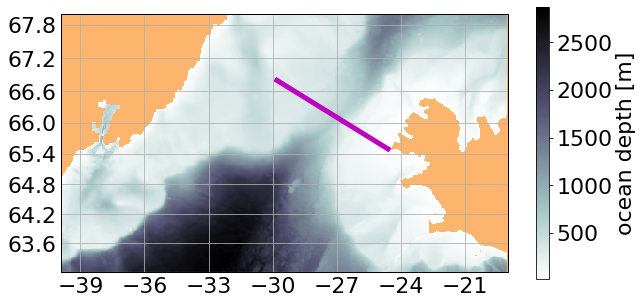

In [8]:
# Mask land
Depth = od_vage2011.dataset['Depth']
Depth = Depth.where(Depth>0)
od_vage2011 = od_vage2011.merge_into_oceandataset(Depth.rename('masked_Depth'))

# Plot Depth
fig = plt.figure(figsize=(10, 5))
ax = od_vage2011.plot.horizontal_section(varName='masked_Depth', cmap='bone_r')
line = ax.plot(X_Latrabjarg, Y_Latrabjarg, 'm-',
               transform=PlateCarree(), linewidth=5)
ax.background_patch.set_facecolor(land_col)
ax.set_extent(map_extent)

# Survey

In [9]:
# Extract transect
od_vage2011_LL = od_vage2011.subsample.survey_stations(Xsurv=X_Latrabjarg, Ysurv=Y_Latrabjarg, delta=2)
print()
od_mastropole2017_LL = od_mastropole2017.subsample.survey_stations(Xsurv=X_Latrabjarg, Ysurv=Y_Latrabjarg, delta=2)

Cutting out the oceandataset.
Carrying out survey.
Create weight file: bilinear_72x120_138x138.nc
Variables to interpolate: ['Depth', 'EXFaqh', 'EXFatemp', 'EXFempmr', 'EXFhl', 'EXFhs', 'EXFlwnet', 'EXFswnet', 'EXFuwind', 'EXFvwind', 'Eta', 'HFacC', 'HFacS', 'HFacW', 'MXLDEPTH', 'RHOAnoma', 'R_low', 'Ro_surf', 'S', 'Temp', 'U', 'V', 'W', 'XC', 'XG', 'XU', 'XV', 'YC', 'YG', 'YU', 'YV', 'dxC', 'dxF', 'dxG', 'dxV', 'dyC', 'dyF', 'dyG', 'dyU', 'fCori', 'fCoriG', 'phiHyd', 'phiHydLow', 'rA', 'rAs', 'rAw', 'rAz', 'masked_Depth'].
Interpolating [Depth].
Interpolating [EXFaqh].
Interpolating [EXFatemp].
Interpolating [EXFempmr].
Interpolating [EXFhl].
Interpolating [EXFhs].
Interpolating [EXFlwnet].
Interpolating [EXFswnet].
Interpolating [EXFuwind].
Interpolating [EXFvwind].
Interpolating [Eta].
Interpolating [HFacC].
Interpolating [HFacS].
Interpolating [HFacW].
Interpolating [MXLDEPTH].
Interpolating [RHOAnoma].
Interpolating [R_low].
Interpolating [Ro_surf].
Interpolating [S].
Interpolatin

# Use OceanSpy to rotate velocities

In [10]:
# Compute aligned velocities
od_vage2011_LL = od_vage2011_LL.compute.survey_aligned_velocities()

Computing survey aligned velocities.


/home/idies/miniconda3/envs/Oceanography/lib/python3.7/site-packages/oceanspy/compute.py:2926: UserWarning: 
These variables are not available and can not be computed: ['AngleCS', 'AngleSN'].
If you think that OceanSpy should be able to compute them, please open an issue on GitHub:
 https://github.com/malmans2/oceanspy/issues
Assuming U=U_zonal and V=V_merid.
If you are using curvilinear coordinates, run `compute.geographical_aligned_velocities` before `subsample.survey_stations`
  ds = survey_aligned_velocities(self._od, **kwargs)


# Plot velocities

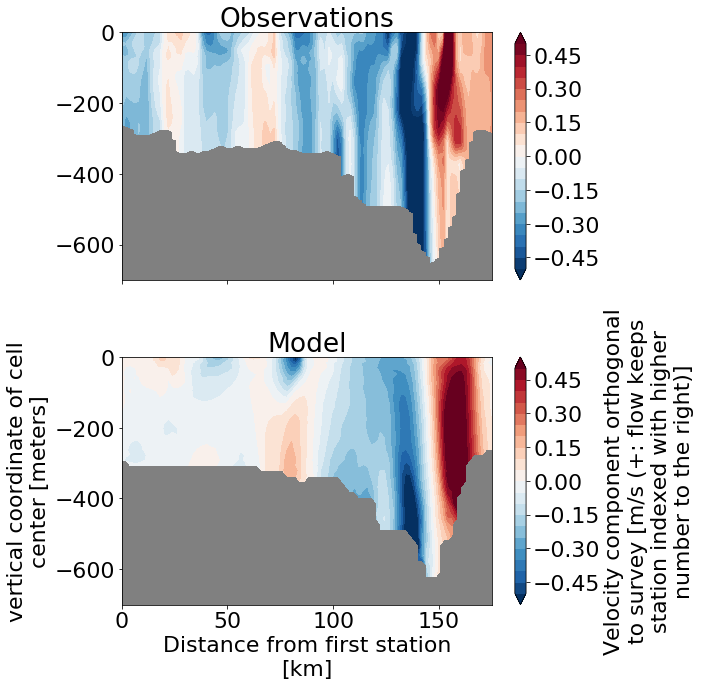

In [11]:
# All metadata for the model are handled by OceanSpy and xarray.
# Need to be added manually for observations.

# Plot
xlim = (0, 175)
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Observations
ax = axes[0]
contf = ax.contourf(vage2011['X'], -vage2011['Y'].astype('float'), -vage2011['OrtVel']*1.E-2,
                    levels=lev_vel, cmap=cmap_vel, extend='both') 
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.colorbar(contf, ax=ax)
_ = ax.set_facecolor(bottom_col)
_ = ax.set_title('Observations')

# Model
ax=axes[1]
ax = od_vage2011_LL.plot.vertical_section(varName='ort_Vel', plotType='contourf',
                                          levels=lev_vel, ax=ax, xlim=xlim, cmap=cmap_vel)
ax.set_ylim(ylim)
_ = ax.set_facecolor(bottom_col)
_ = ax.set_title('Model')

# Use OceanSpy to compute density and $N^2$

In [12]:
# Compute density
od_mastropole2017_LL = od_mastropole2017_LL.compute.potential_density_anomaly()
od_mastropole2017_LL = od_mastropole2017_LL.compute.Brunt_Vaisala_frequency()

Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Computing Brunt-Väisälä Frequency using the following parameters: {'rho0': 1027, 'g': 9.81}.
Computing gradient.


# Plot hydrography

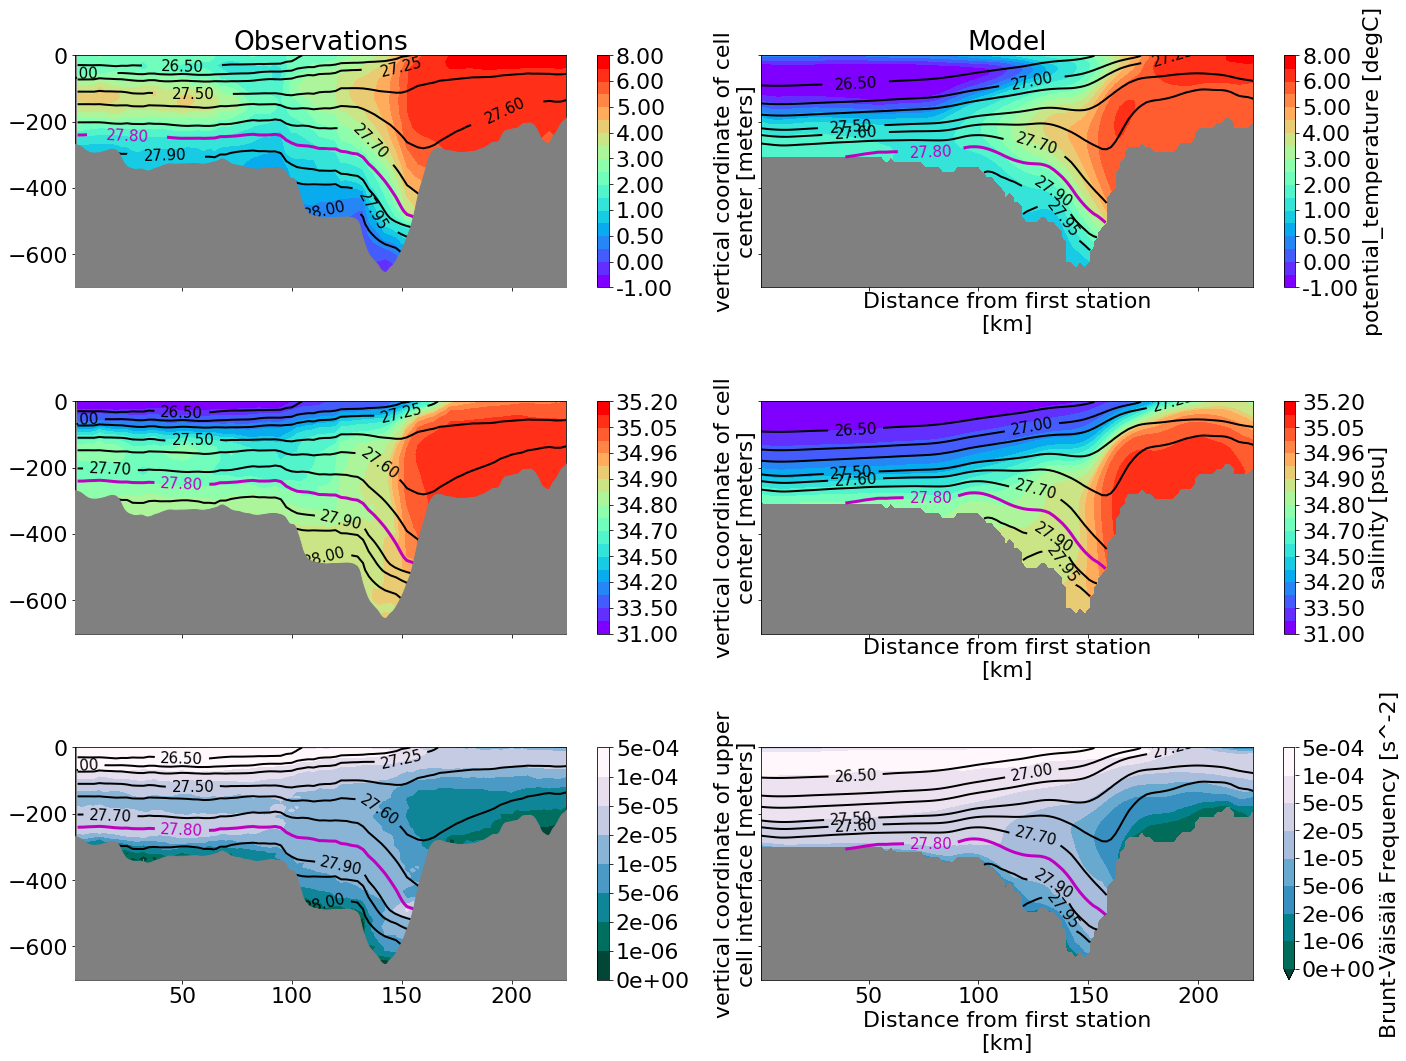

In [13]:
# Same as before:
# All metadata for the model are handled by OceanSpy and xarray.
# Need to be added manually for observations.

# Initialize figure
xlim = (1, 225)
fig, axes = plt.subplots(3, 2, figsize=(20, 15), sharex=True, sharey=True)
for a, ax in enumerate(axes.flatten()):
    # Pick variable
    if a in [0, 1]:
        var_mod = 'Temp'
        var_obs = 'THE'
        cmap = cmap_hyd
        levels = lev_Temp
        fmt_cbar='%.2f'
    elif a in [2, 3]:
        var_mod = 'S'
        var_obs = 'SAL'
        cmap = cmap_hyd
        levels = lev_S
        fmt_cbar='%.2f'
    elif a in [4, 5]:
        var_mod = 'N2'
        var_obs = 'NSQ'
        cmap = cmap_N2
        levels = lev_N2
        fmt_cbar='%.0e'
        
    # Isopycnals properties
    contour_kwargs = {'levels': lev_Sigma0,
                      'colors': ['k' if (lev!=27.8) else 'm' for lev in lev_Sigma0],
                      'linewidths': [2 if (lev!=27.8) else 3 for lev in lev_Sigma0]}
    clabel_kwargs = {'fontsize': clabel_size, 'fmt':'%2.2f'}
                     
    
    if a%2 == 0:
        # Observations
        cols = mpl.colors.BoundaryNorm(levels, 256)
        contf = ax.contourf(mastropole2017['X'], -mastropole2017['Y'].astype('float'), mastropole2017[var_obs],
                            cmap=cmap, levels=levels, norm=cols) 
        cont = ax.contour(mastropole2017['X'], -mastropole2017['Y'].astype('float'), mastropole2017['SIG'],
                          **contour_kwargs) 
        plt.colorbar(contf, ax=ax, format=fmt_cbar)
        ax.clabel(cont, **clabel_kwargs)
        ax.fill_between(np.squeeze(bathyobs['regdist']), -np.squeeze(bathyobs['regbat']), -np.squeeze(bathyobs['regbat'])*0-700,
                        color=bottom_col, zorder=10)
        
        
    else:
        # Model
        ax = od_mastropole2017_LL.plot.vertical_section(varName=var_mod, contourName='Sigma0', plotType='contourf',
                                                        levels=levels, ax=ax, xlim=xlim, cmap=cmap,
                                                        contour_kwargs=contour_kwargs, clabel_kwargs=clabel_kwargs,
                                                        cbar_kwargs={'format': fmt_cbar})
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_facecolor(bottom_col)
    if a==0:
        ax.set_title('Observations')
    elif a==1:
        ax.set_title('Model')
    else:
        ax.set_title(None)

# Add more?
I stored all variables in `od_vage2011`, so all OceanSpy operations can be applied to this oceandataset.  
The only limitation is that operations based on `time` are not allowed because there is one snapshot only (e.g., EKE).  
A simple example:

Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Computing Brunt-Väisälä Frequency using the following parameters: {'rho0': 1027, 'g': 9.81}.
Computing gradient.
Computing relative vorticity.
Computing curl.
Computing gradient.
Computing gradient.
Computing gradient.
Computing gradient.
Computing Ertel potential vorticity using the following parameters: {'rho0': 1027, 'g': 9.81, 'omega': 7.292123516990375e-05}.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Computing gradient.
Cutting out the oceandataset.
Computing weighted_mean.
Computing weighted_mean.


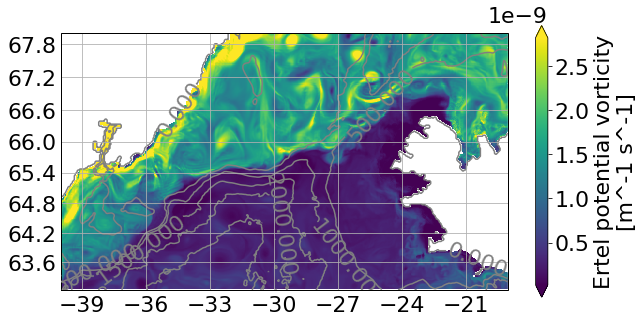

In [14]:
# Compute Ertel PV
od_vage2011 = od_vage2011.compute.Ertel_potential_vorticity()

# Plot Ertel PV in the first 100m
fig = plt.figure(figsize=(10, 5))
od_vage2011.plot.horizontal_section(varName='Ertel_PV',
                                    contourName='Depth',
                                    meanAxes='Z',
                                    cutout_kwargs={'ZRange': [0, -100]},
                                    robust=True)